## Load dataset

Dataset yang digunakan adalah dataset <a href='https://www.kaggle.com/szamil/who-suicide-statistics'>WHO Suicide Statistics</a> yang terdiri dari 43776 baris dan 6 kolom.

__Feature Information:__

* __country :__ nama negara yang terdata
* __year :__ tahun
* __sex :__ jenis kelamin 
* __age :__ rentang usia
* __suicides_no :__ jumlah orang yang melakukan bunuh diri
* __population :__ populasi penduduk 

Pertama <i>import</i> dahulu <i>library</i> yang akan digunakan. Dalam praktek ini, menggunakan Pandas dan Matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<i>load</i> dataset menggunakan <code>read_csv()</code> dan menyimpannya dalam variabel <code>df</code>.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py/

/content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py


In [4]:
df = pd.read_csv("who_suicide_statistics.csv")
df.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


lakukan pengecekan dataframe info.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


Dari informasi di atas, kolom <code>suicides_no</code> dan <code>population</code> bertipe float, padahal itu mengandung bilangan integer. Ubah tipe data <code>suicides_no</code> menjadi <code>Int64</code>. Sementara itu, kolom <code>populasi</code> biarkan saja karena tidak akan digunakan dalam praktek ini.

In [6]:
# Mengubah tipe data kolom suicides_no

df['suicides_no'] = df['suicides_no'].astype('Int64')
df['suicides_no'].dtypes

Int64Dtype()

Sekarang tipe data sudah berubah menjadi Int64.

## Visualisasi data dengan Line Plot

Apa itu <i>line plot</i> ?

__Line plot__ atau <i>line chart</i> adalah jenis plot yang menampilkan informasi berupa rangkaian titik data yang terhubung dengan segmen garis lurus. Line plot merupakan jenis plot dasar dalam visualisasi data. Plot jenis ini dapat digunakan pada dataset yang memiliki nilai kontinu untuk melihat pergerakan data dari waktu ke waktu.

Visualisasi data dengan <i>line plot</i>. Disini kita akan mencoba <i>plotting</i> menggunakan satu data dan beberapa data atau kategori.

### Single line

Menampilkan grafik jumlah orang yang melakukan bunuh diri setiap tahunnya di dunia. Sebelumnya buat dataframe baru yang menyediakan data tersebut.

Dari dataframe <code>df</code> di atas, lakukan <i>grouping</i> berdasarkan tahun atau kolom <code>year</code> dan tampilkan jumlah total orang yang melakukan bunuh diri atau kolom <code>suicides_no</code> menggunakan agregasi <code>sum</code>.

Perhatikan kode berikut.

In [7]:
# Grouping data

df_year = df.groupby(['year'])[['suicides_no']].sum()
df_year

,suicides_no
year,
1979,92790
1980,153548
1981,178014
1982,182893
1983,122430
1984,124427
1985,197533
1986,189225
1987,186364


Indeks dari dataframe <code>df_year</code> adalah tahun atau <code>year</code>.

Jika dilihat dari dataframe <code>df_year</code> di atas, baris dengan indeks __2016__ sangat sedikit jumlahnya dan dirasa tidak sesuai dengan tahun-tahun sebelumnya. Kemungkinan karena tidak semua negara telah memiliki data <i>suicides</i> pada tahun tersebut dan melaporkannya. Oleh karena itu, hapus data tersebut karena merupakan <i>outliers</i>.

In [8]:
# Menghapus baris 2016

df_year = df_year.drop(2016, axis=0)
df_year.tail()

,suicides_no
year,
2011,239972
2012,234085
2013,229421
2014,227793
2015,207908


Membuat <i>line plot</i> di Pandas, dengan <i>method</i> <code>plot()</code> yang sudah disediakan oleh Python. Masukkan dua nilai/data sebagai sumbu <code>x</code> dan <code>y</code> di dalam tanda kurung <code>()</code>.

Perhatikan contoh berikut.

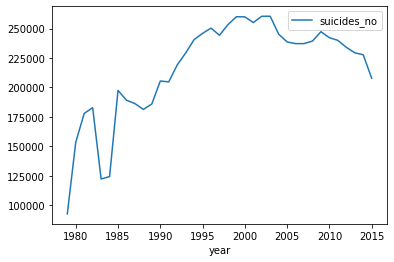

In [9]:
# Plotting dengan Pandas

df_year.plot()

Jika menggunakan Pandas, hanya perlu menuliskan variabel dataframe/series-nya yang diikuti oleh <i>method</i> <code>.plot()</code>.

Bagaimana jika ingin menggunakan Matplotlib untuk menampilkan visualisasinya?

Pertama harus definisikan dahulu nilai x dan y. Disini untuk axis x akan ditempati oleh indeks <code>df_year</code>, sedangkan untuk axis y akan ditempati oleh <code>df_year['suicides_no']</code>. Dalam beberapa kasus, mungkin dapat langsung mendefinisikannya tanpa mengubahnya menjadi list. Namun, untuk mengantisipasi <i>error</i> yang mungkin terjadi, sebaiknya ubah dulu menjadi list seperti di bawah ini. 

In [10]:
# Mendefinisikan nilai x dan y

x = list(df_year.index)
y = list(df_year['suicides_no'])

Setelah itu buat plotnya dengan Matplotlib menggunakan cara <i>implicit</i> seperti di bawah ini.

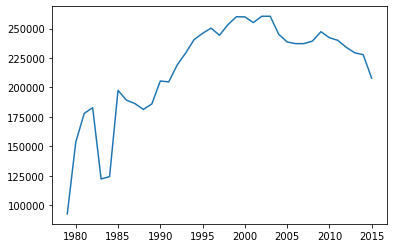

In [11]:
# Visualisasi data dengan Matplotlib

plt.plot(x, y)

<code>df_year.index</code> yang dalam hal ini adalah tahunnya, menjadi sumbu <code>x</code>, sedangkan <code>df_year['suicides_no']</code> atau kolom yang berisi jumlah orang yang melakukan bunuh diri, menjadi sumbu <code>y</code>.

### Multiple line

<i>Plotting</i> beberapa data. Misalnya menampilkan grafik data orang yang melakukan bunuh dari dari negara-negara tertentu pada rentang tahun tertentu. Disini kita akan ambil negara <code>Australia</code>, <code>Japan</code>, <code>Republic of Korea</code>, <code>United Kingdom</code>, dan <code>United States of America</code>. Sementara tahunnya, kita akan ambil dari tahun __2006__ hingga __2015__.

Pertama, buat dua buah kondisi untuk memilih <code>country</code> dan <code>year</code> seperti di bawah ini. Tanda <code>|</code> merupakan simbol <code>or</code> alias __'atau'__.

In [12]:
# Membuat kondisi

con_countries = (df['country']=='Australia') | (df['country']=='Japan') | (df['country']=='Republic of Korea') |     \
                (df['country']=='United Kingdom') | (df['country']=='United States of America')

con_years = (df['year']==2006) | (df['year']==2007) | (df['year']==2008) | (df['year']==2009) | (df['year']==2010) |   \
            (df['year']==2011) | (df['year']==2012) | (df['year']==2013) | (df['year']==2014) | (df['year']==2015)

Setelah membuat kondisi, sekarang lihat dataframe yang di-<i>filter</i> dengan kondisi tersebut. Simpan hasil <i>filter</i> tersebut ke dalam variabel <code>df_choice</code>. Jangan lupa untuk me-<i>reset</i> indeks dari dataframe tersebut.

In [13]:
# Membuat dataframe yang di-filter dengan kondisi

df_choice = df[con_countries & con_years].reset_index(drop=True)
df_choice

,country,year,sex,age,suicides_no,population
0,Australia,2006,female,15-24 years,68,1388615.0
1,Australia,2006,female,25-34 years,74,1444570.0
2,Australia,2006,female,35-54 years,195,2934459.0
3,Australia,2006,female,5-14 years,1,1332380.0
4,Australia,2006,female,55-74 years,115,1798232.0
...,...,...,...,...,...,...
595,United States of America,2015,male,25-34 years,5503,22137097.0
596,United States of America,2015,male,35-54 years,11634,41658010.0
597,United States of America,2015,male,5-14 years,255,21273987.0
598,United States of America,2015,male,55-74 years,9068,32264697.0


Sekarang telah mendapatkan dataframe yang dibutuhkan. Selanjutnya untuk memudahkan proses visualisasi dengan <i>line plot</i>, transformasikan dataframe di atas menjadi bentuk <i>pivot table</i> menggunakan <i>method</i> <code>pivot_table()</code> dari Python.

In [14]:
# Tranformasi menjadi pivot table

pivot_choice = df_choice.pivot_table(index='year', columns='country', values='suicides_no', aggfunc='sum')
pivot_choice

country,Australia,Japan,Republic of Korea,United Kingdom,United States of America
year,,,,,
2006,2117,29769,10653,4122,33292
2007,2229,30665,12174,3897,34596
2008,2341,30073,12858,4259,36030
2009,2337,30523,15402,4246,36900
2010,2420,29411,15558,4188,38362
2011,2392,28766,15906,4393,39508
2012,2580,26338,14159,4444,40596
2013,2608,25991,14426,4824,41143
2014,2891,24357,13834,4788,42769


Ada beberapa parameter yang digunakan pada kode di atas untuk membuat <i>pivot table</i>.

* <code>index</code> untuk menentukan fitur/kolom yang akan menjadi indeksnya, 
* <code>columns</code> untuk menentukan fitur yang akan menjadi kolom, 
* <code>values</code> untuk menentukan fitur yang akan dijadikan nilai dari dataframe, dan 
* <code>aggfunc</code> adalah metode agregasi apa yang akan digunakan untuk memproses <i>values</i>.

Dari kode di atas, kita menjadikan <code>year</code> sebagai indeks dan <code>country</code> sebagai kolom. Sementara itu, nilainya sudah pasti adalah <code>suicides_no</code> dengan agregasi <code>sum</code> karena kita ingin mengetahui total jumlahnya.

Setelah mendapatkan bentuk dataframe yang ideal, sekarang lakukan <i>plotting</i>.

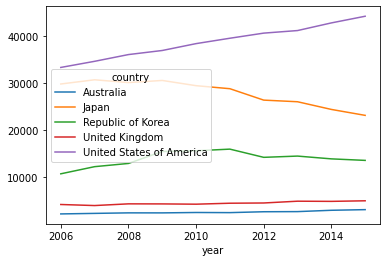

In [15]:
# Plotting data

pivot_choice.plot(kind='line')

Sekarang sudah mendapatkan visualisasi yang diinginkan. 

Namun seperti yang kita lihat, gambar visualisasi tersebut masih sangat sederhana. Ukurannya adalah ukuran <i>default</i>. Untuk mengatur serta menambahkan beberapa komponen pada grafik tersebut, bisa ditambahkan beberapa pengaturan.

## Pengaturan dasar

Ada banyak <i>method</i> di Matplotlib yang dapat digunakan untuk mempercantik visualisasi data:

### Figure Size

Yang pertama adalah cara mengatur ukuran <i>figure</i>. Atur ukuran <i>figure</i> dengan parameter <code>figsize</code> yang dapat diberikan nilai berupa tuple yang terdiri dari dua bilangan untuk mendefinisikan lebar dan tingginya.

Misalnya ingin memperbesar grafik kita dengan mengatur <i>figure size</i>-nya menjadi <code>figsize=(16, 8)</code>.

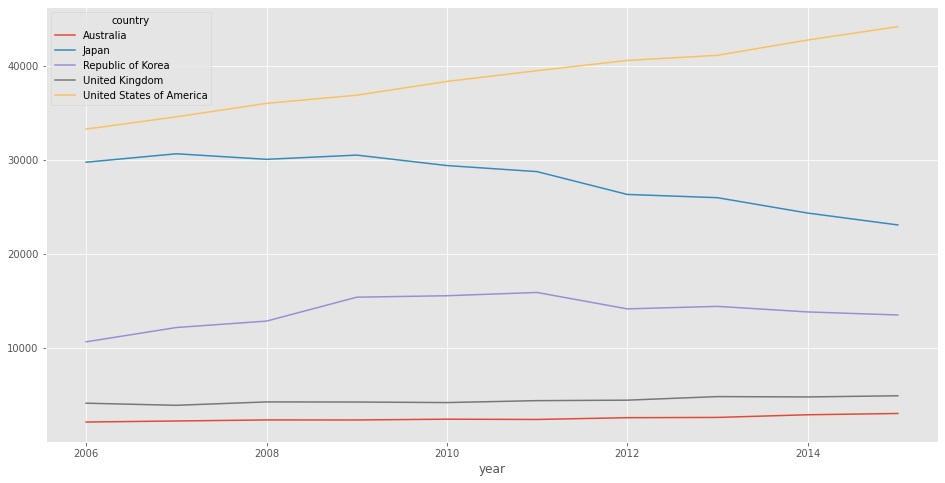

In [16]:
# Contoh pengaturan figure size

plt.style.use('ggplot')    # style matplotlib

# Mengatur figure size
pivot_choice.plot(kind='line', figsize=(16, 8))

plt.show()

### Title

Untuk menambahkan <i>title</i> atau judul di visualisasi data, gunakan <i>method</i> <code>.title()</code> pada Matplotlib <code>plt</code>.

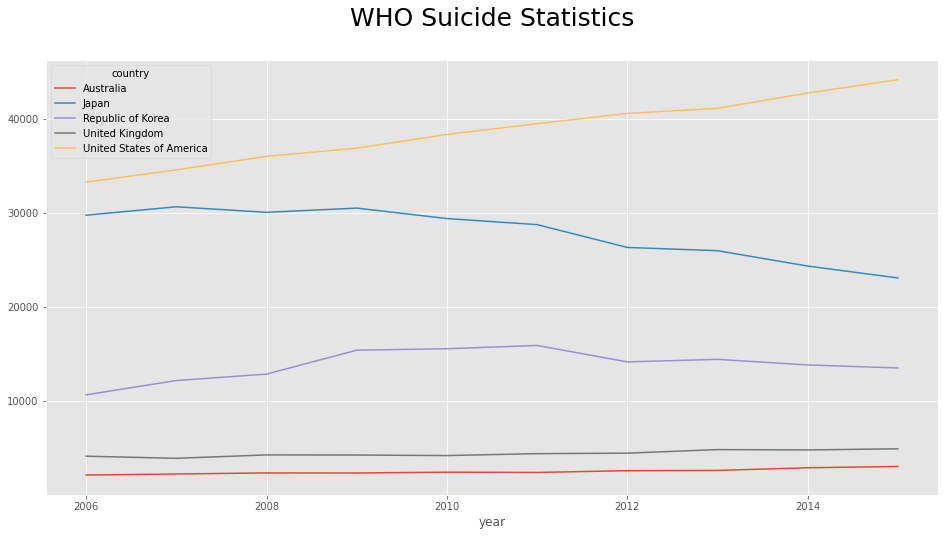

In [17]:
# Contoh pengaturan title

plt.style.use('ggplot')    # style matplotlib

pivot_choice.plot(kind='line', figsize=(16, 8))

# Mengatur judul grafik
plt.title('WHO Suicide Statistics\n', size=25)

plt.show()

### Label

Memberikan label sebagai keterangan sumbu <code>x</code> dan <code>y</code> menggunakan <i>method</i> <code>.xlabel()</code> dan <code>.ylabel()</code>.

* <code>.xlabel()</code> untuk memberikan label pada sumbu <code>x</code>.
* <code>.ylabel()</code> untuk memberikan label pada sumbu <code>y</code>.

Mengatur ukuran hurufnya dengan menambahkan parameter <code>size</code>.

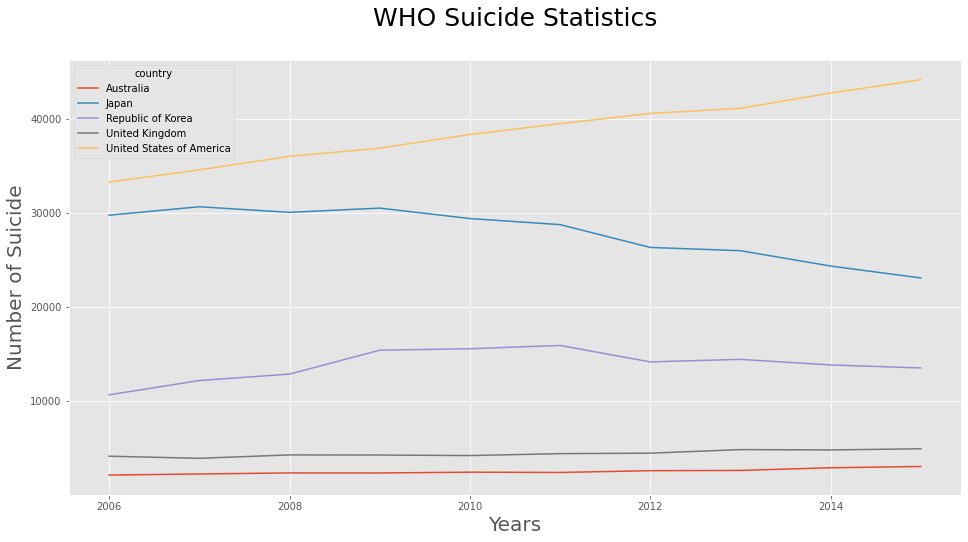

In [18]:
# Contoh pengaturan label

plt.style.use('ggplot')    # style matplotlib

pivot_choice.plot(kind='line', figsize=(16, 8))
plt.title('WHO Suicide Statistics\n', size=25)

# Mengatur label pada sumbu x dan y
plt.ylabel('Number of Suicide', size=20)
plt.xlabel('Years', size=20)

plt.show()

### Ticks

Untuk mengatur ukuran dari <i>ticks</i>, kita dapat menggunakan <code>.xticks()</code> dan <code>.yticks()</code> dengan memberikan parameter <code>size</code>. Perhatikan kode berikut.

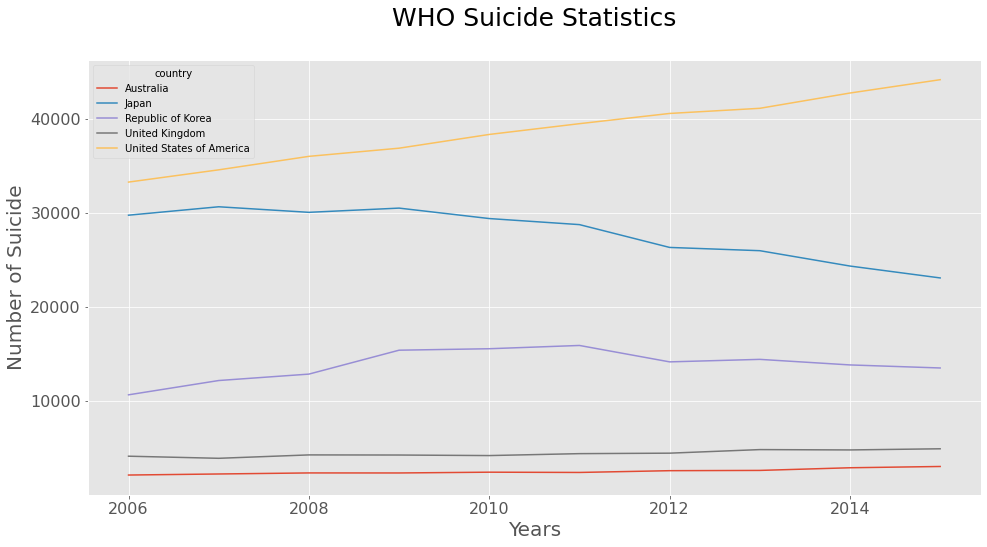

In [19]:
# Contoh pengaturan ticks

plt.style.use('ggplot')    # style matplotlib

pivot_choice.plot(kind='line', figsize=(16, 8))
plt.title('WHO Suicide Statistics\n', size=25)
plt.ylabel('Number of Suicide', size=20)
plt.xlabel('Years', size=20)

# Mengatur xticks dan yticks
plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

### Legend

<i>Legend</i> juga dapat diatur ukurannya menggunakan <code>.legend()</code> seperti di bawah ini.

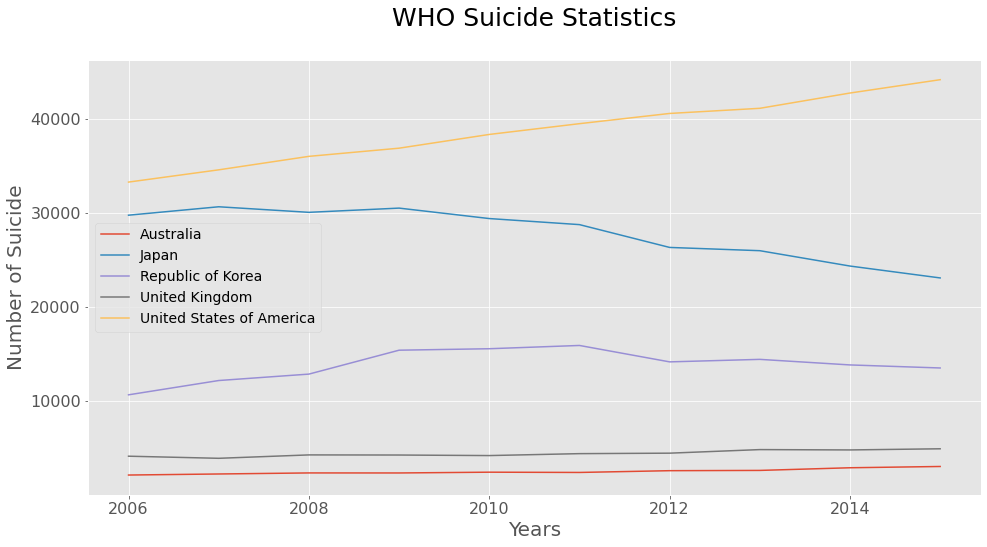

In [20]:
# Contoh pengaturan legend

plt.style.use('ggplot')    # style matplotlib

pivot_choice.plot(kind='line', figsize=(16, 8))
plt.title('WHO Suicide Statistics\n', size=25)
plt.ylabel('Number of Suicide', size=20)
plt.xlabel('Years', size=20)
plt.xticks(size=16)
plt.yticks(size=16)

# Mengatur legend
plt.legend(prop={'size': 14})

plt.show()

Jika tidak di-<i>set</i>, posisi <i>legend</i> akan otomatis mencari <i>space</i> yang kosong sehingga tidak menutupi <i>line</i>.

### Line color

Mengatur <i>line color</i> atau warna garisnya dengan menambahkan parameter <code>color</code> atau dapat disingkat dengan <code>c</code>. Jadi misalnya kita ingin warna garisnya __orange__, maka tambahkan <code>color = 'orange'</code> atau <code>c = 'orange'</code>.

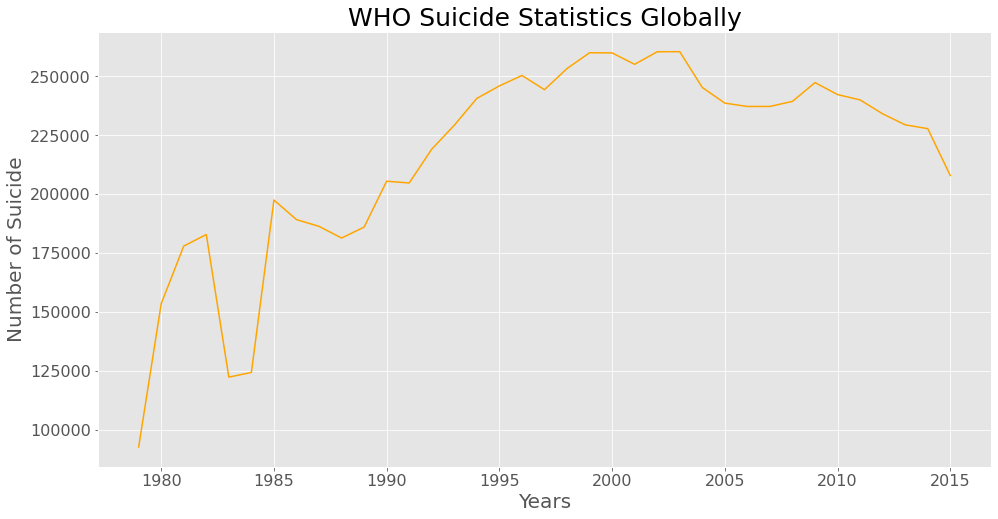

In [21]:
# Contoh pengaturan line color

plt.figure(figsize=(16, 8))      # Mengatur figsize dengan Matplotlib

# Mengatur line color
plt.plot(x, y, color='orange')

plt.title('WHO Suicide Statistics Globally', size=25)
plt.ylabel('Number of Suicide', size=20)
plt.xlabel('Years', size=20)
plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

Selain langsung menuliskan nama warnanya, dapat juga menggunakan kode warna <i>hexadecimal</i>.

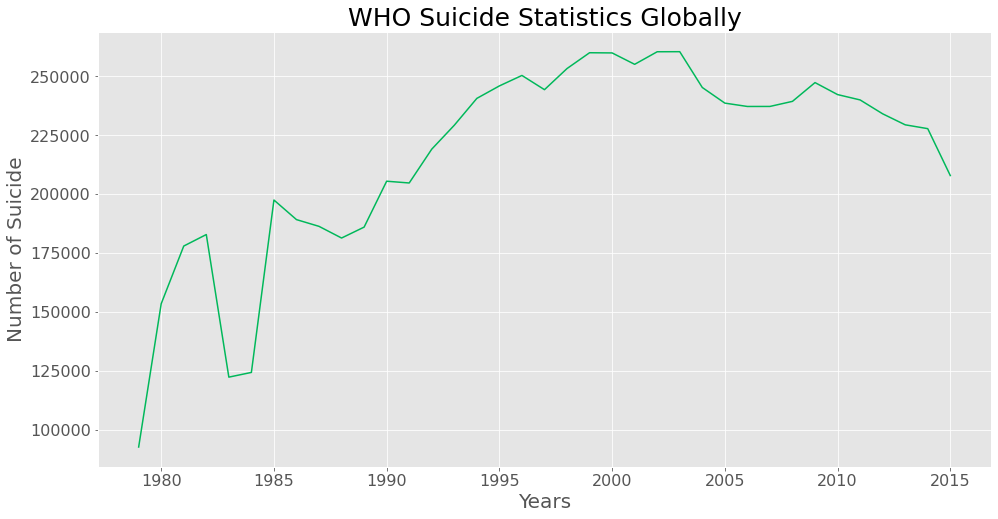

In [22]:
# Contoh pengaturan line color

plt.figure(figsize=(16, 8))

# Mengatur line color dengan kode warna hexadecimal
plt.plot(x, y, c='#00b85a')

plt.title('WHO Suicide Statistics Globally', size=25)
plt.ylabel('Number of Suicide', size=20)
plt.xlabel('Years', size=20)
plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

### Line style

Untuk mengatur jenis garis, kita dapat menggunakan parameter <code>linestyle</code> atau <code>ls</code>. Misalnya jika ingin menampilkan garis putus-putus, tambahakan <code>linestyle = 'dashed'</code>.

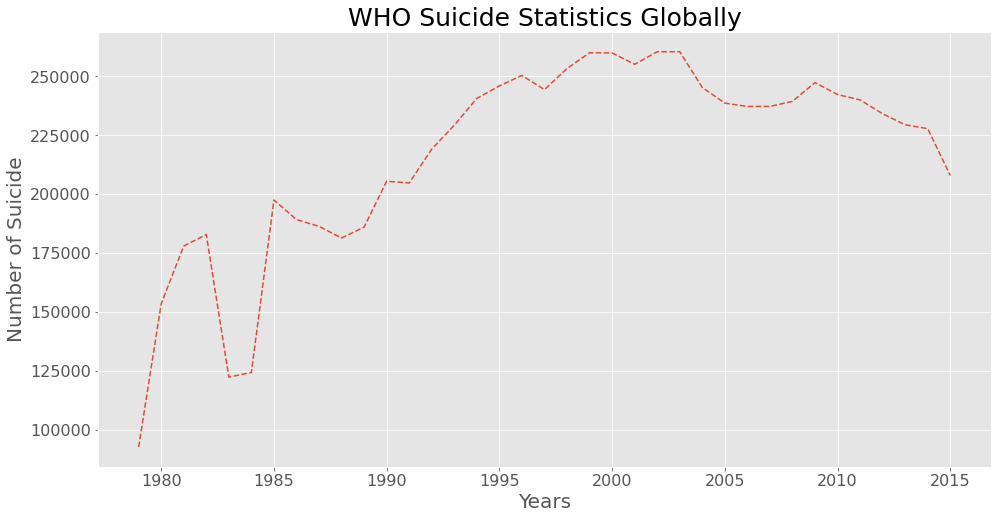

In [23]:
# Contoh pengaturan line style

plt.figure(figsize=(16, 8))

# Mengatur line style
plt.plot(x, y, linestyle='dashed')

plt.title('WHO Suicide Statistics Globally', size=25)
plt.ylabel('Number of Suicide', size=20)
plt.xlabel('Years', size=20)
plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

Kita juga dapat menggunakan simbol <code>'--'</code> untuk menampilkan garis putus-putus.

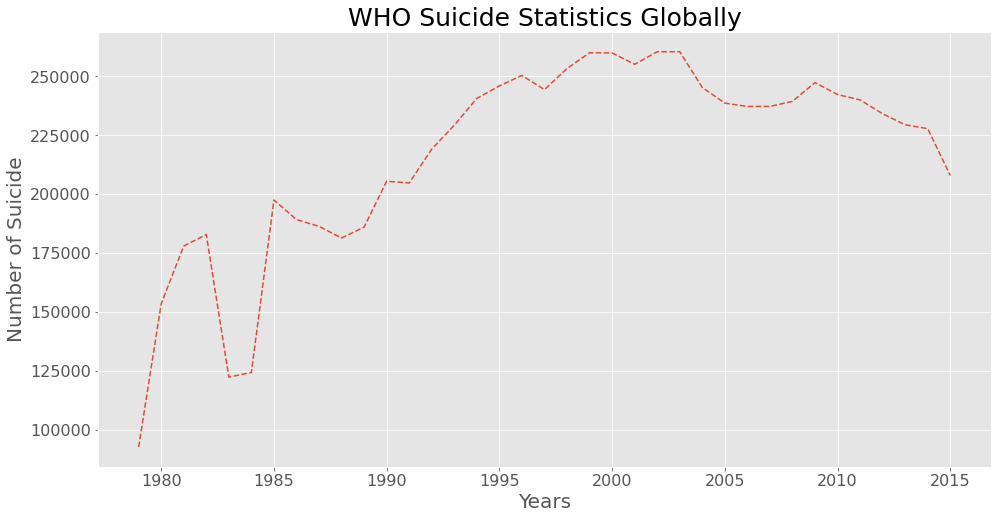

In [24]:
# Contoh pengaturan line style

plt.figure(figsize=(16, 8))

# Mengatur line style dengan simbol 
plt.plot(x, y, ls='--')

plt.title('WHO Suicide Statistics Globally', size=25)
plt.ylabel('Number of Suicide', size=20)
plt.xlabel('Years', size=20)
plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

### Line width

Ketebalan garis juga dapat diatur. Caranya yaitu dengan memberikan parameter <code>linewidth</code> atau <code>lw</code>, dimana nilai yang berisi bilaingan float.

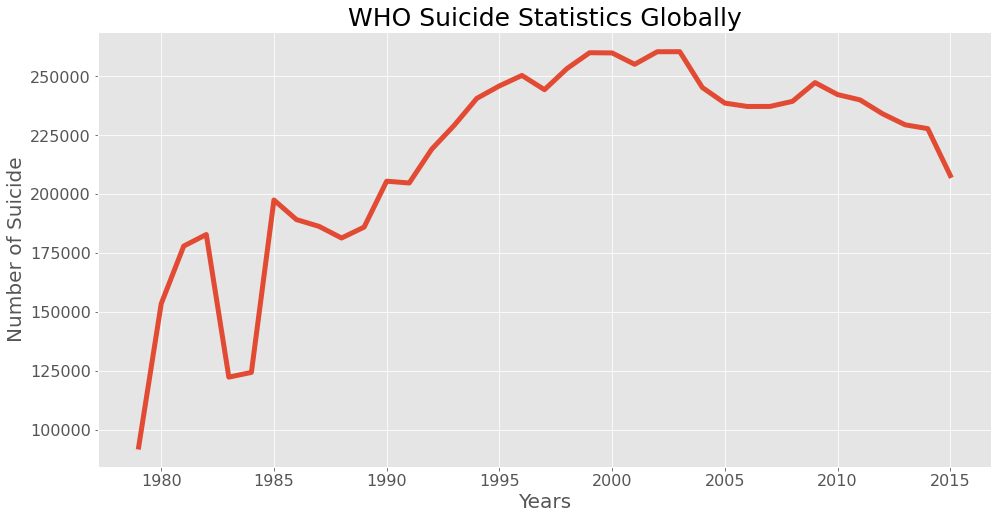

In [25]:
# Contoh pengaturan line width

plt.figure(figsize=(16, 8))

# Mengatur line width
plt.plot(x, y, linewidth='5')

plt.title('WHO Suicide Statistics Globally', size=25)
plt.ylabel('Number of Suicide', size=20)
plt.xlabel('Years', size=20)
plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

dapat juga menggunakan <code>lw</code>.

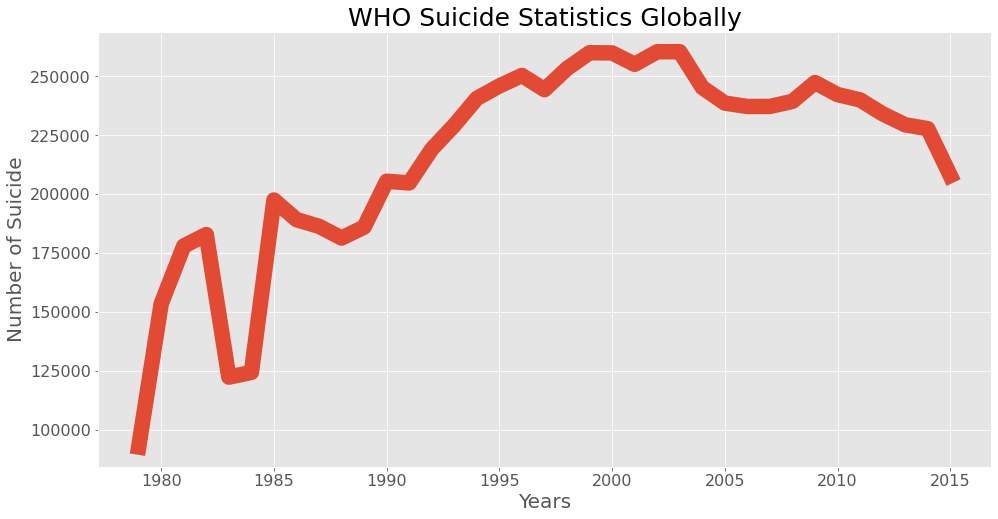

In [26]:
# Contoh pengaturan line width

plt.figure(figsize=(16, 8))

# Mengatur line width
plt.plot(x, y, lw='15.5')

plt.title('WHO Suicide Statistics Globally', size=25)
plt.ylabel('Number of Suicide', size=20)
plt.xlabel('Years', size=20)
plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

### Marker

dapat juga menambahkan tanda pada setiap titik di <i>line plot</i> dengan parameter <code>marker</code>. Misal ingin garisnya berupa lingkaran-lingkaran kecil.

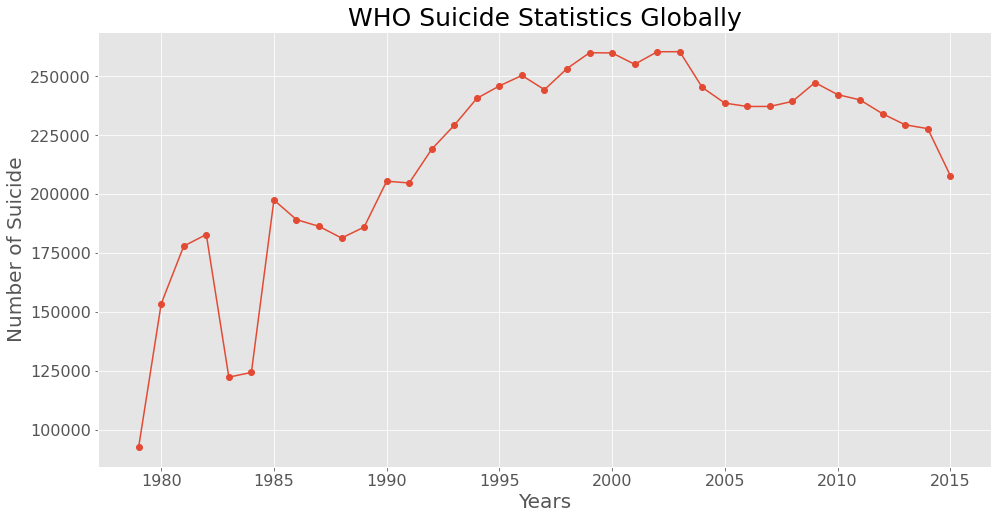

In [27]:
# Contoh pengaturan marker

plt.figure(figsize=(16, 8))

# Mengatur marker
plt.plot(x, y, marker='o')

plt.title('WHO Suicide Statistics Globally', size=25)
plt.ylabel('Number of Suicide', size=20)
plt.xlabel('Years', size=20)
plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

Contoh di bawah ini adalah <i>line plot</i> dengan marker berupa kotak persegi.

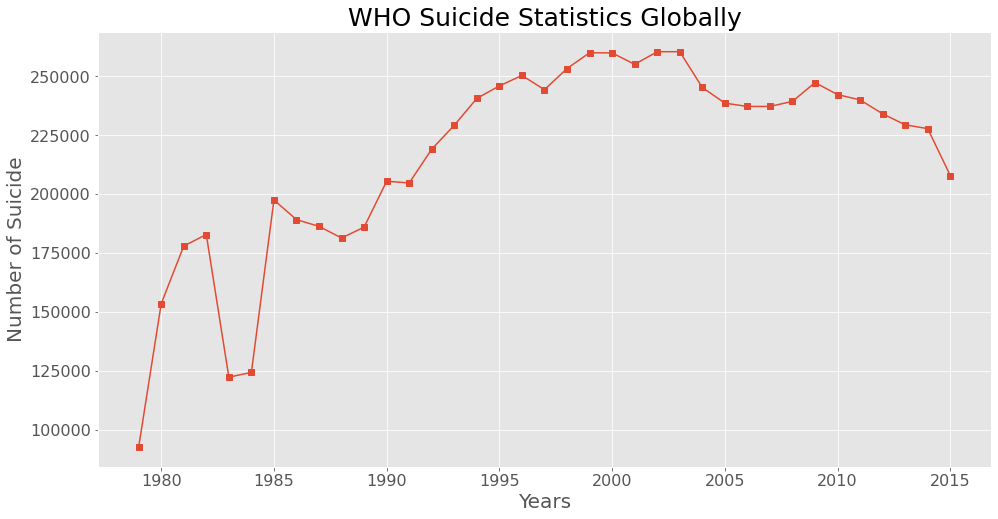

In [28]:
# Contoh pengaturan marker

plt.figure(figsize=(16, 8))

# Mengatur marker
plt.plot(x, y, marker='s')

plt.title('WHO Suicide Statistics Globally', size=25)
plt.ylabel('Number of Suicide', size=20)
plt.xlabel('Years', size=20)
plt.xticks(size=16)
plt.yticks(size=16)

plt.show()



---


Semoga Bermanfaat dan jangan lupa main-main kesini: <a href="https://nurpurwanto.github.io/">**nurpurwanto**</a> Terimakasih.

---


